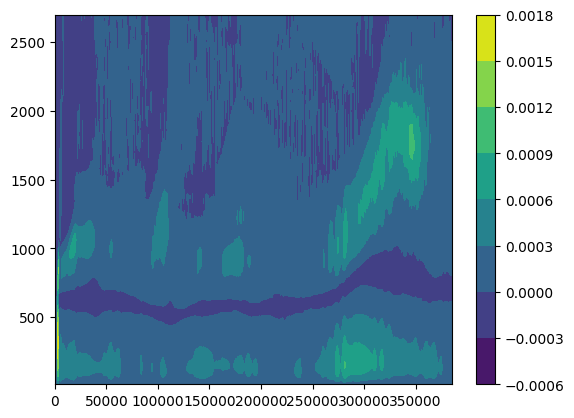

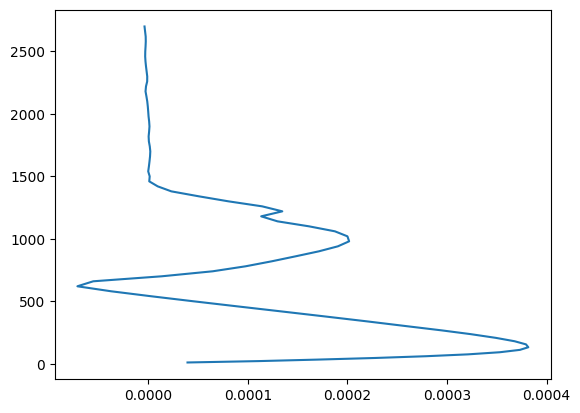

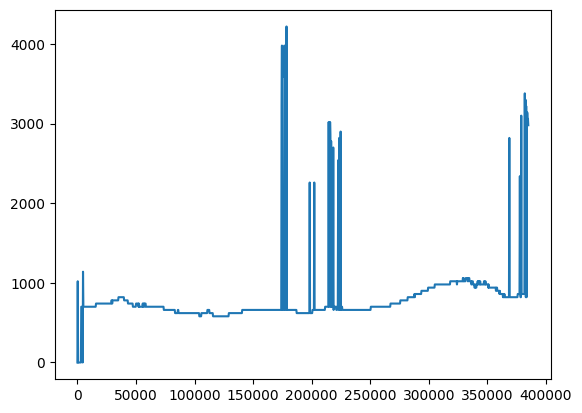

In [1]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime


#pwd='/users/PFS0220/graghuna/microhh/microhh/cases/eurec4a/case_1060T1_feb2_100m_36hrs/'
pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_specific_final_200m/'
nc_nums=1;
nc_vals = ['0000']

startdate=datetime(2020,1,30,00,00)


for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=False)
    xrdata_budget=xr.open_dataset(pwd+nc_filename,group='budget',decode_times=False);
    tke_buoy1=xrdata_budget['tke_buoy'].values;
    time1=xrdata['time'].values
    z1=xrdata['z'].values
    if n==0:
        tke_buoy=tke_buoy1
        time=time1
        z=z1;
    else:
        tke_buoy=np.concatenate((tke_buoy,tke_buoy1));
        time=np.concatenate((time,time1));
        z=np.concatenate((z,z1));

z_bacc=np.zeros(len(time))
dz=40; z_ind=int(3000/dz);
for i in range(len(time)):
    min_ind=int(np.nonzero(tke_buoy[i,0:z_ind]==min(tke_buoy[i,0:z_ind]))[0][0])
    flag=0;j=0
    while flag==0:
        if tke_buoy[i,min_ind+j]<0 and tke_buoy[i,min_ind+j+1]>0:
            z_bacc[i]=z[min_ind+j+1]
            flag=1;
        elif j>40:
            z_bacc[i]=0
            flag=1;
        else:
            flag=0;
        j=j+1

pl.figure()
pl.contourf(time,z[0:z_ind],np.transpose(tke_buoy[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.plot(tke_buoy[200,0:int(3000/dz)],z[0:int(3000/dz)])

pl.figure()
pl.plot(time,z_bacc)


In [12]:
import numpy as np
z_new=np.zeros(300)
dz=10
z_abs=10;
for i in range(0,z_new.size): 
        if i<12:
            dz=dz+int(round(0.1*dz,0));
        elif i==14:
              z_abs=300;
              dz=40;
        elif z_abs>5000:
            dz=dz+int(round(0.1*dz,0));
        z_new[i] = z_abs;
        z_abs = z_abs+dz
z_end_ind=np.nonzero((z_new>29000))[0][0]
z=z_new[0:z_end_ind+1]
print(np.int_(z))

[   10    21    33    46    60    75    92   111   132   155   180   207
   237   267   300   340   380   420   460   500   540   580   620   660
   700   740   780   820   860   900   940   980  1020  1060  1100  1140
  1180  1220  1260  1300  1340  1380  1420  1460  1500  1540  1580  1620
  1660  1700  1740  1780  1820  1860  1900  1940  1980  2020  2060  2100
  2140  2180  2220  2260  2300  2340  2380  2420  2460  2500  2540  2580
  2620  2660  2700  2740  2780  2820  2860  2900  2940  2980  3020  3060
  3100  3140  3180  3220  3260  3300  3340  3380  3420  3460  3500  3540
  3580  3620  3660  3700  3740  3780  3820  3860  3900  3940  3980  4020
  4060  4100  4140  4180  4220  4260  4300  4340  4380  4420  4460  4500
  4540  4580  4620  4660  4700  4740  4780  4820  4860  4900  4940  4980
  5020  5064  5112  5165  5223  5287  5357  5434  5519  5612  5714  5826
  5949  6084  6233  6397  6577  6775  6993  7233  7497  7787  8106  8457
  8843  9268  9735 10249 10814 11435 12118 12869 13